# FINANCE DATA PROJECT

#### First, we need to import some libraries. The pandas-datareader library allow us to read the data as a data frame directly from some web pages (documentation page https://pandas-datareader.readthedocs.io/en/latest/index.html )

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime as dt

We need to set the start/end date for read 

In [2]:
start = dt.datetime(2006, 1, 1)
end = dt.datetime(2016,12,31)

We are going to use Yahoo Finances (https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-yahoo) to read stocks prices for some banks 

In [3]:
BAC = data.DataReader("BAC", 'yahoo', start, end) ##BANK OF AMERICA
JPM= data.DataReader("JPM", 'yahoo', start, end) ##JPMORGAN
C=data.DataReader("C", 'yahoo', start, end) ##CITIGROUP

In [4]:
GS = data.DataReader("GS", 'yahoo', start, end) ##GOLDMAN SACHS
MS= data.DataReader("MS", 'yahoo', start, end) ##MORGAN STANLEY
WFC=data.DataReader("WFC", 'yahoo', start, end) ##WELLSFARGO

Let's see how one of this Data Frames looks like

In [22]:
C.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,493.799988,481.100006,490.000000,492.899994,1537600.0,358.130768
2006-01-04,491.000000,483.500000,488.600006,483.799988,1870960.0,351.518768
2006-01-05,487.799988,484.000000,484.399994,486.200012,1143160.0,353.262665
2006-01-06,489.000000,482.000000,488.799988,486.200012,1370210.0,353.262665
2006-01-09,487.399994,483.000000,486.000000,483.899994,1680740.0,351.591461


In [6]:
tickers=['BAC','C','GS', 'JPM','MS','WFC']

Making just one DataFrame

In [7]:
bank_stocks=pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [8]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.364235  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.009895  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.052418  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.002815  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.024082  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  34.886650  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  34.910557  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.006298  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.042191  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  35.413139  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  19.975794  
2006-01-04   31.799999  31.530001  10870000.0  19.744106  
2006-01-05   31.500000  31.495001  10158000.0  19.722193  
2006-01-06   31.580000  31.680000   8403800.0  19.838036  
2006-01-09   31.674999  31.674999   5619600.0  19.834902  

[5 rows x 36 columns]

In [9]:
bank_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2769 entries, 2006-01-03 to 2016-12-30
Data columns (total 36 columns):
(BAC, High)         2769 non-null float64
(BAC, Low)          2769 non-null float64
(BAC, Open)         2769 non-null float64
(BAC, Close)        2769 non-null float64
(BAC, Volume)       2769 non-null float64
(BAC, Adj Close)    2769 non-null float64
(C, High)           2769 non-null float64
(C, Low)            2769 non-null float64
(C, Open)           2769 non-null float64
(C, Close)          2769 non-null float64
(C, Volume)         2769 non-null float64
(C, Adj Close)      2769 non-null float64
(GS, High)          2769 non-null float64
(GS, Low)           2769 non-null float64
(GS, Open)          2769 non-null float64
(GS, Close)         2769 non-null float64
(GS, Volume)        2769 non-null int64
(GS, Adj Close)     2769 non-null float64
(JPM, High)         2769 non-null float64
(JPM, Low)          2769 non-null float64
(JPM, Open)         2769 non-null flo

### Exploratory data analysis

**What is the max Close price for each bank's stock throughout the time period?**

In [10]:
bank_stocks.loc[ : ,[('BAC','Close'),('C','Close'),('GS','Close'),('JPM','Close'),('MS','Close'),('WFC','Close')]].max()

Bank Ticker  Stock Info
BAC          Close          54.900002
C            Close         564.099976
GS           Close         247.919998
JPM          Close          87.129997
MS           Close          89.300003
WFC          Close          58.520000
dtype: float64

**Returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

**DataFrame of returns:**

In [24]:
returns=pd.DataFrame(index=bank_stocks.index)

In [25]:
tickers=['BAC','C','GS', 'JPM','MS','WFC']   #returns dataFrame with 0 values
for string in tickers:
    returns[string+' Return']=0
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,0,0,0,0,0,0
2006-01-04,0,0,0,0,0,0
2006-01-05,0,0,0,0,0,0
2006-01-06,0,0,0,0,0,0
2006-01-09,0,0,0,0,0,0


The pct_change() function is used to get percentage change between the current and a prior element

In [26]:
for string in tickers:
    returns[string+ ' Return']=bank_stocks.loc[:,
                                      [(string,'Close')]].pct_change()

In [27]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


**Pairplot of the returns dataframe**

In [28]:
import seaborn as sns
sns.set_style('whitegrid')

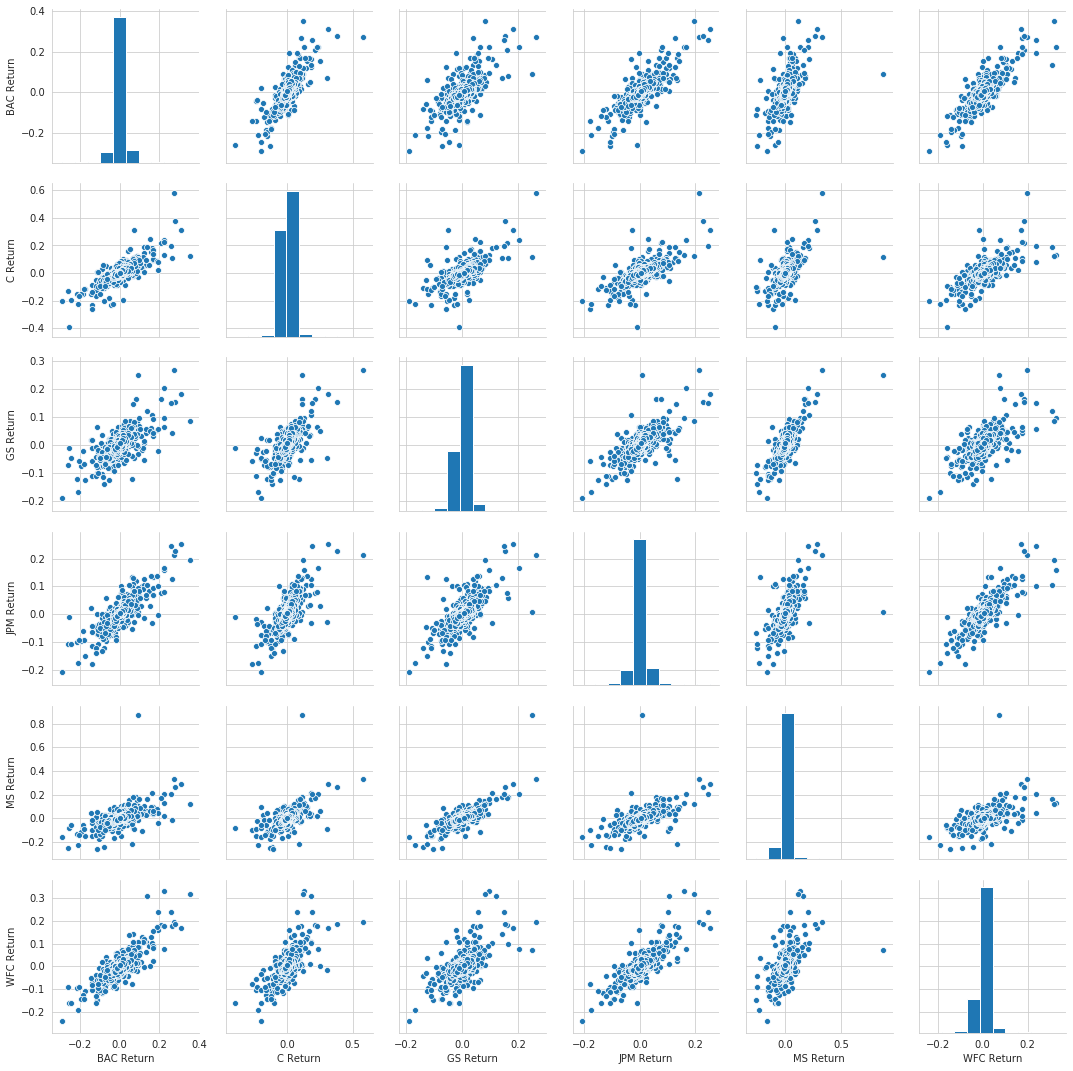

In [29]:
sns.pairplot(returns[1:])

**What dates each bank stock had the best and worst single day returns?**

**The best**

In [30]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

**The worst**

In [31]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

**2009-01-20 was a bad day for 4 of the banks**

In [32]:
returns.std()

BAC Return    0.035467
C Return      0.037360
GS Return     0.024736
JPM Return    0.026794
MS Return     0.036583
WFC Return    0.029184
dtype: float64

**Which would you classify as the riskiest for the year 2015?**

In [33]:
returns[returns.index.year==2015].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

### Some visualizations

In [89]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

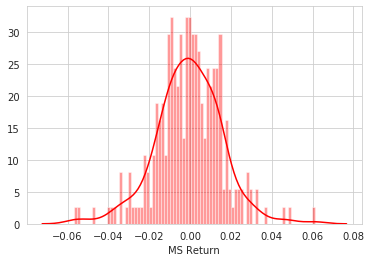

In [34]:
returns_2015=returns[returns.index.year==2015]
sns.distplot(returns_2015['MS Return'][1:],color='red',bins=80)

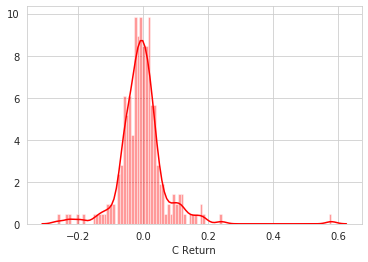

In [35]:
returns_2008=returns[returns.index.year==2008]
sns.distplot(returns_2008['C Return'],color='red',bins=100)

Let's see the evolution of close prices during the entire index of time

In [37]:
bank_stocks_close=bank_stocks.xs(key='Close',axis=1,level='Stock Info')
bank_stocks_close.head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999


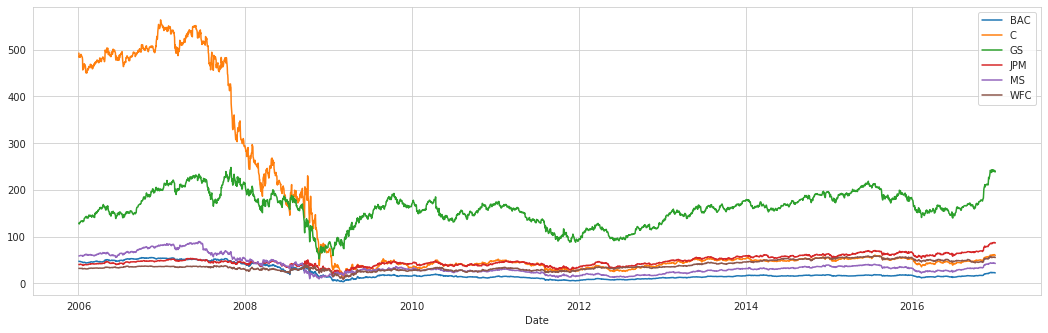

In [41]:
fig=plt.figure(figsize=(14,4))
axes=fig.add_axes([0,0,1,1])
axes.plot(bank_stocks_close.index,bank_stocks_close)
axes.set_xlabel('Date')
axes.legend(tickers)

Same plot but with plotly

In [64]:
fig=px.line(bank_stocks_close, x=bank_stocks_close.index, y=['BAC','C','GS','JPM','MS','WFC'],
           title='Close prices')
fig.show()

Rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008

*A rolling average continuously updates the average of a data set to include all the data in the set until that point.*

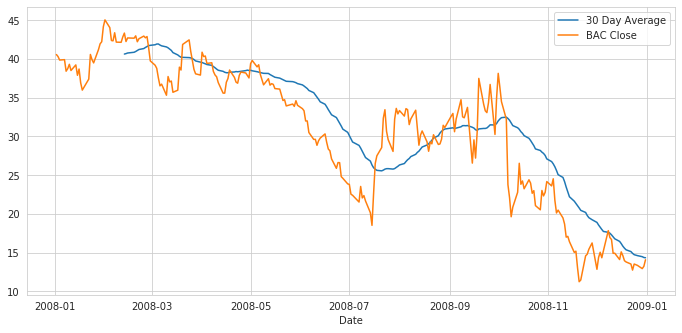

In [65]:
fig=plt.figure(figsize=(9,4))
axes=fig.add_axes([0,0,1,1])
axes.plot(bank_stocks[bank_stocks['BAC']['Close'].index.year==2008]['BAC']['Close'].rolling(30).mean())
axes.plot(bank_stocks[bank_stocks['BAC']['Close'].index.year==2008]['BAC']['Close'])
axes.set_xlabel('Date')
axes.legend(['30 Day Average', 'BAC Close'])

*Same plot but with plotly*

In [114]:

fig=go.Figure()

fig.add_trace(go.Scatter(x=bank_stocks.index[bank_stocks.index.year==2008],
            y=bank_stocks[bank_stocks['BAC']['Close'].index.year==2008]['BAC']['Close'].rolling(30).mean(),
            name='30 Day Average')
            )

fig.add_trace(go.Scatter(x=bank_stocks.index[bank_stocks.index.year==2008],
            y=bank_stocks[bank_stocks['BAC']['Close'].index.year==2008]['BAC']['Close'],
            name= 'BAC close'))
